In [1]:
import numpy as np
import cv2 # OpenCV biblioteka
import matplotlib
import matplotlib.pyplot as plt
import pylab
import imageio as img

In [2]:
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 
# prikaz vecih slika
matplotlib.rcParams['figure.figsize'] = 16,12
kernel = np.ones((3, 3))

Y centar:
275
X centar:
346


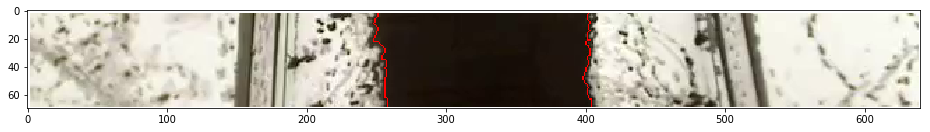

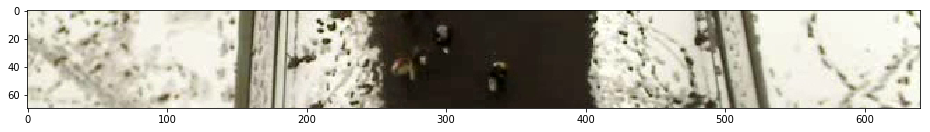

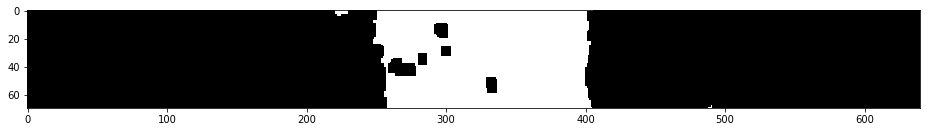

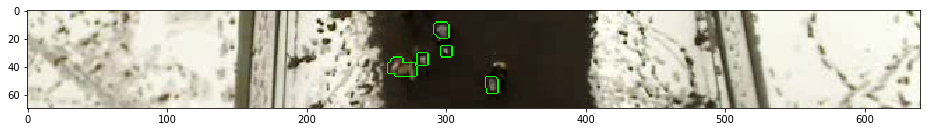

In [10]:
filename = 'videos/video10.mp4'
vid = img.get_reader(filename,  'ffmpeg')

#for i in range(225,226):
image = vid.get_data(0)

#plt.imshow(image);
#plt.show()

image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

image_invert = 255-image_gray
#image_bin = image_gray > 60

#ADAPTIVE THRESHOLD
ret, image_bin = cv2.threshold(image_invert, 200, 255, cv2.THRESH_BINARY)
image_bin = cv2.erode(image_bin, kernel, iterations=1)
#image_bin = cv2.dilate(image_bin, kernel, iterations=1)

#fig = plt.figure()
#fig.suptitle('FRAME #{}'.format(i), fontsize=20)
#plt.imshow(image_bin, 'gray');
#plt.show()



####### searching for contours
slika, contours, hierarchy = cv2.findContours(image_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

contours_p = [] #ovde ce biti samo konture koje pripadaju bar-kodu
for contour in contours: # za svaku konturu
    center, size, angle = cv2.minAreaRect(contour) # pronadji pravougaonik minimalne povrsine koji ce obuhvatiti celu konturu
    width, height = size
    if height > 50: # kontura platoa
        contours_p.append(contour) # ova kontura je plato


slika = image.copy()
cv2.drawContours(slika, contours_p, -1, (255, 0, 0), 1)


# determine the most extreme points along the contour
c = max(contours_p, key=cv2.contourArea)
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])


# draw extreme points of contour rectangle
cv2.circle(slika, extLeft, 8, (0, 0, 255), -1)
cv2.circle(slika, extRight, 8, (0, 255, 0), -1)
cv2.circle(slika, extTop, 8, (255, 0, 0), -1)
cv2.circle(slika, extBot, 8, (255, 255, 0), -1)


print("Y centar:") #y
center_y = int(((extBot[1]-extTop[1])/2)+extTop[1])
print(center_y)

print("X centar:") #y
center_x = int(((extRight[0]-extLeft[0])/2)+extLeft[0])
print(center_x)


#draw central point inside plato contour
#cv2.circle(slika, (center_x, center_y), 8, (255, 255, 255), -1)

#rectangle inside scene which is our designated area of observation
cv2.rectangle(slika, (0, center_y-35), (640, center_y+35), (255, 255, 255), 2)
io = slika[center_y-35:center_y+35, :]

plt.imshow(io)
plt.show()

    
    
    
#contouring cropped area of frame
for i in range(217,218):
    image = vid.get_data(i)
    cropped = image[center_y-35:center_y+35, :]
    
    plt.imshow(cropped);
    plt.show()
    
    image_gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
    
    image_invert = 255-image_gray
    
    #ADAPTIVE THRESHOLD
    ret, image_bin = cv2.threshold(image_invert, 180, 255, cv2.THRESH_BINARY)
    image_bin = cv2.dilate(image_bin, kernel, iterations=1)
    image_bin = cv2.erode(image_bin, kernel, iterations=3)
    
    plt.imshow(image_bin, 'gray');
    plt.show()
    
    
    
    
    ############# searching for pedestrians using circle contouring
    nova, contours, hierarchy = cv2.findContours(image_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    contours_pedestrians = [] #ovde ce biti samo konture koje pripadaju bar-kodu
    for contour in contours: # za svaku konturu
        (x,y),radius = cv2.minEnclosingCircle(contour) #circular contours
        center = (int(x),int(y)) #contour center
        radius = int(radius) #contour radius
        if radius < 25 and radius > 4: # radius of pedestrian contour
            contours_pedestrians.append(contour) # adding pedestrian contour


    nova = cropped.copy()
    cv2.drawContours(nova, contours_pedestrians, -1, (0, 255, 0), 1)
    
    plt.imshow(nova)
    plt.show()
    

    
